<a href="https://colab.research.google.com/github/siddharthsinh-dev/sentiment-analysis-movie-reviews-iu/blob/main/notebooks/IU_Sentiment_Analysis_IMDB_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# IU Project NLP DLBAIPNLP01
# Task 1: Sentiment Analysis on Movie Reviews
# Dataset: IMDB Large Movie Review Dataset
# Source: Stanford AI Lab
# URL: https://ai.stanford.edu/~amaas/data/sentiment/

In [5]:
#Import required libraries

import os
import re
import tarfile
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [6]:
# Download NLTK resources for preprocessing

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
# Download the IMDB Large Movie Review Dataset from Stanford AI

dataset_url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
dataset_path = "aclImdb_v1.tar.gz"

print("Downloading dataset..")

urllib.request.urlretrieve(dataset_url, dataset_path)

print("Download completed")

Download completed


In [8]:
# Extracting the IMDB dataset

print("Extracting dataset..")

with tarfile.open(dataset_path, "r:gz") as tar:
    tar.extractall()

print("Extraction completed")

Extracting dataset..


/tmp/ipython-input-3082205963.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Extraction completed


In [9]:
# Load IMDB training data

train_pos_path = "aclImdb/train/pos"
train_neg_path = "aclImdb/train/neg"

reviews = []
labels = []

# Load positive reviews
for file in os.listdir(train_pos_path):
    with open(os.path.join(train_pos_path, file), encoding="utf-8") as f:
        reviews.append(f.read())
        labels.append(1)  # 1 = positive

# Load negative reviews
for file in os.listdir(train_neg_path):
    with open(os.path.join(train_neg_path, file), encoding="utf-8") as f:
        reviews.append(f.read())
        labels.append(0)  # 0 = negative

print("Number of training reviews loaded:", len(reviews))

Number of training reviews loaded: 25000


In [10]:
# Convert the loaded reviews and labels into a pandas DataFrame

data = pd.DataFrame({
    "review": reviews,
    "sentiment": labels
})

# Display first few rows
print("First 5 samples:")
print(data.head())

# Check class distribution
print("\nClass distribution:")
print(data["sentiment"].value_counts())

First 5 samples:
                                              review  sentiment
0  I gave it an 8 only because it had received su...          1
1  this movie is a very relaxed, romantic-comedy,...          1
2  Having no knowledge of this film prior to seei...          1
3  The first time i saw it i got half of it but i...          1
4  this was a very good movie i wished i could fi...          1

Class distribution:
sentiment
1    12500
0    12500
Name: count, dtype: int64


In [11]:
# Create a small experimental subset of 2,000 samples

small_data = data.sample(n=2000, random_state=42)

print("Small dataset size:", len(small_data))
print("\nClass distribution in small dataset:")
print(small_data["sentiment"].value_counts())

Small dataset size: 2000

Class distribution in small dataset:
sentiment
1    1040
0     960
Name: count, dtype: int64


In [14]:
# Data preprocessing

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r"<.*?>", " ", text)

    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters
    text = re.sub(r"[^a-z\s]", " ", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize, remove stopwords, and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(words)

In [15]:
# Apply preprocessing to the small dataset

small_data["clean_review"] = small_data["review"].apply(preprocess_text)

print("Original review:")
print(small_data["review"].iloc[0][:300])

print("\nCleaned review:")
print(small_data["clean_review"].iloc[0][:300])

Original review:
Sometimes you have to look back to go forward. The 60's did just that. We need to remember the past. The past is part of the future.<br /><br />Great mix Gary J. Coppola. I see a great future. You deserve to be nominated and win, The 60's best mixer of the year.<br /><br />Best mini-series of all ti

Cleaned review:
sometimes look back go forward need remember past past part future great mix gary j coppola see great future deserve nominated win best mixer year best mini series time thanks ursula


In [16]:
# Split the small dataset into training set and testing set

X_small = small_data["clean_review"]
y_small = small_data["sentiment"]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_small, y_small, test_size=0.2, random_state=42, stratify=y_small
)

print("Train size:", len(X_train_small))
print("Test size:", len(X_test_small))

Train size: 1600
Test size: 400


In [17]:
# Convert text to TF-IDF features and train a Naive Bayes baseline model

tfidf_vectorizer = TfidfVectorizer(max_features=20000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_small)
X_test_tfidf = tfidf_vectorizer.transform(X_test_small)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_small)

y_pred_nb = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy on small dataset:", round(accuracy_score(y_test_small, y_pred_nb), 4))
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test_small, y_pred_nb))

Naive Bayes Accuracy on small dataset: 0.8425

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       192
           1       0.82      0.89      0.86       208

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [18]:
# Train Linear SVM on the same TF-IDF features

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train_small)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("Linear SVM Accuracy on small dataset:", round(accuracy_score(y_test_small, y_pred_svm), 4))
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test_small, y_pred_svm))

Linear SVM Accuracy on small dataset: 0.8525

Classification Report (Linear SVM):
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       192
           1       0.85      0.87      0.86       208

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [19]:
# Load IMDB test dataset with official test split of 25000 reviews

test_pos_path = "aclImdb/test/pos"
test_neg_path = "aclImdb/test/neg"

test_reviews = []
test_labels = []

# Positive test reviews
for file in os.listdir(test_pos_path):
    with open(os.path.join(test_pos_path, file), encoding="utf-8") as f:
        test_reviews.append(f.read())
        test_labels.append(1)

# Negative test reviews
for file in os.listdir(test_neg_path):
    with open(os.path.join(test_neg_path, file), encoding="utf-8") as f:
        test_reviews.append(f.read())
        test_labels.append(0)

print("Number of test reviews loaded:", len(test_reviews))

Number of test reviews loaded: 25000


In [20]:
# Convert full training data to DataFrame

full_train_data = pd.DataFrame({
    "review": reviews,
    "sentiment": labels
})

print("Full training dataset size:", len(full_train_data))
print(full_train_data["sentiment"].value_counts())

Full training dataset size: 25000
sentiment
1    12500
0    12500
Name: count, dtype: int64


In [21]:
# Convert full testing data to DataFrame

full_test_data = pd.DataFrame({
    "review": test_reviews,
    "sentiment": test_labels
})

print("Full testing dataset size:", len(full_test_data))
print(full_test_data["sentiment"].value_counts())

Full testing dataset size: 25000
sentiment
1    12500
0    12500
Name: count, dtype: int64


In [22]:
# Preprocess full training and testing datasets

print("Preprocessing full training data...")
full_train_data["clean_review"] = full_train_data["review"].apply(preprocess_text)
print("Training data preprocessing completed.")

print("\nPreprocessing full testing data...")
full_test_data["clean_review"] = full_test_data["review"].apply(preprocess_text)
print("Testing data preprocessing completed.")

Preprocessing full training data...
Training data preprocessing completed.

Preprocessing full testing data...
Testing data preprocessing completed.


In [23]:
# TF-IDF on full dataset - train & evaluate Naive Bayes and Linear SVM

X_train_full = full_train_data["clean_review"]
y_train_full = full_train_data["sentiment"]

X_test_full = full_test_data["clean_review"]
y_test_full = full_test_data["sentiment"]

print("Vectorizing with TF-IDF..")
tfidf_full = TfidfVectorizer(max_features=50000)

X_train_full_tfidf = tfidf_full.fit_transform(X_train_full)
X_test_full_tfidf = tfidf_full.transform(X_test_full)

print("TF-IDF vectorization completed.")

# Naive Bayes
print("\nTraining Naive Bayes..")
nb_full = MultinomialNB()
nb_full.fit(X_train_full_tfidf, y_train_full)

y_pred_nb_full = nb_full.predict(X_test_full_tfidf)

print("Naive Bayes Accuracy (full dataset):", round(accuracy_score(y_test_full, y_pred_nb_full), 4))
print("\nClassification Report (Naive Bayes - full dataset):")
print(classification_report(y_test_full, y_pred_nb_full))

# Linear SVM
print("\nTraining Linear SVM..")
svm_full = LinearSVC()
svm_full.fit(X_train_full_tfidf, y_train_full)

y_pred_svm_full = svm_full.predict(X_test_full_tfidf)

print("Linear SVM Accuracy (full dataset):", round(accuracy_score(y_test_full, y_pred_svm_full), 4))
print("\nClassification Report (Linear SVM - full dataset):")
print(classification_report(y_test_full, y_pred_svm_full))

Vectorizing with TF-IDF..
TF-IDF vectorization completed.

Training Naive Bayes..
Naive Bayes Accuracy (full dataset): 0.8312

Classification Report (Naive Bayes - full dataset):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     12500
           1       0.87      0.78      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


Training Linear SVM..
Linear SVM Accuracy (full dataset): 0.8661

Classification Report (Linear SVM - full dataset):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     12500
           1       0.88      0.85      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



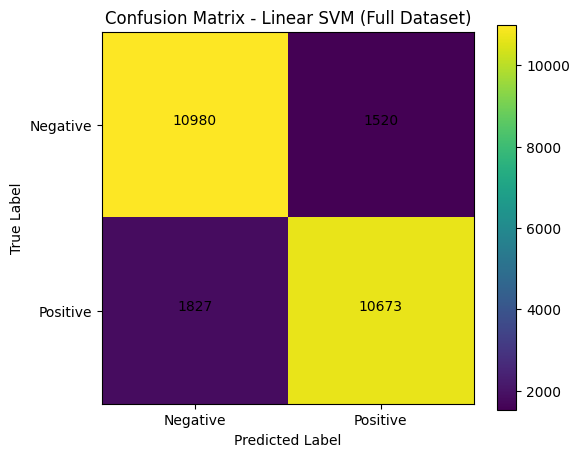

In [24]:
# Confusion Matrix for Linear SVM (Full Dataset)

cm = confusion_matrix(y_test_full, y_pred_svm_full)

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix - Linear SVM (Full Dataset)")
plt.colorbar()

tick_marks = [0, 1]
plt.xticks(tick_marks, ["Negative", "Positive"])
plt.yticks(tick_marks, ["Negative", "Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], horizontalalignment="center")

plt.show()

In [25]:
# Create a results summary table

results_summary = pd.DataFrame([
    {"Dataset": "Small (2,000 samples)", "Model": "Naive Bayes", "Accuracy": 0.8425},
    {"Dataset": "Small (2,000 samples)", "Model": "Linear SVM",  "Accuracy": 0.8525},
    {"Dataset": "Full (25k train / 25k test)", "Model": "Naive Bayes", "Accuracy": 0.8312},
    {"Dataset": "Full (25k train / 25k test)", "Model": "Linear SVM",  "Accuracy": 0.8661},
])

results_summary

,Dataset,Model,Accuracy
0,"Small (2,000 samples)",Naive Bayes,0.8425
1,"Small (2,000 samples)",Linear SVM,0.8525
2,Full (25k train / 25k test),Naive Bayes,0.8312
3,Full (25k train / 25k test),Linear SVM,0.8661
